In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('property_data.csv')

In [3]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


Fiturnya apa aja?
1. ST_NUM : Street Number (int atau float)
2. ST_NAME : Street Name (string)
3. OWN_OCCUPIED : Ditempati (Y) atau tidak (N)
lanjutin weh jangan lupa

### Standard Missing Values

Standard missing values adalah missing values yang dapat dideteksi Pandas.

In [5]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [6]:
df['ST_NUM'].isnull().sum()

2

In [7]:
for col in df.columns:
    print(f'{col} : {df[col].isnull().sum()}')

PID : 1
ST_NUM : 2
ST_NAME : 0
OWN_OCCUPIED : 1
NUM_BEDROOMS : 2
NUM_BATH : 1
SQ_FT : 1


In [8]:
df.isnull().any()

PID              True
ST_NUM           True
ST_NAME         False
OWN_OCCUPIED     True
NUM_BEDROOMS     True
NUM_BATH         True
SQ_FT            True
dtype: bool

In [9]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

### Non-Standard Missing Values

Terkadang mungkin kasus di mana ada missing values yang memiliki format berbeda.

In [10]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [11]:
df['NUM_BEDROOMS'].value_counts()

3     3
1     1
2     1
--    1
na    1
Name: NUM_BEDROOMS, dtype: int64

In [12]:
invalid_num_bedrooms = ["na", "--"]
df[df['NUM_BEDROOMS'].isin(invalid_num_bedrooms)]
df.drop(df[df['NUM_BEDROOMS'].isin(invalid_num_bedrooms)]
.index)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950


In [13]:
missing_values = ["n/a", "na", "--"]
df = pd.read_csv("property_data.csv", na_values = missing_values)

In [14]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


### Unexpected Missing Values

di own_occupied ada value 12, num_bath ada HURLEY (hurley saha?) 

In [15]:
### Cara 1
cnt=0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

In [16]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [17]:
### Cara 2
### We know expected values for own occupied is either Y or N so we can check:
### if the value is not Y / N change it to np.nan

In [18]:
cnt=0
for row in df['NUM_BATH']:
    try:
        int(row)
        pass
    except ValueError:
        df.loc[cnt, 'NUM_BATH']=np.nan
    cnt+=1

In [19]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,NaN,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [20]:
median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median, inplace=True)

In [21]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,NaN,NaN
2,100003000.0,NaN,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [22]:
median_num_bath = int(df['NUM_BATH'].median())
df['NUM_BATH'].fillna(median_num_bath, inplace=True)

In [24]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1,NaN
2,100003000.0,NaN,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,1,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,1,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


### Analysing Obesity Data

In [25]:
%matplotlib inline
data = pd.ExcelFile('obes.xls')

In [26]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [27]:
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)

In [28]:
data_age

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [29]:
data_age.rename(columns={u'Unnamed: 0': u'Year'}, inplace=True)
### kalo ga ada u nya di depan juga bisa gais

In [30]:
data_age.dropna(inplace=True)

In [31]:
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [32]:
data_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 1 to 11
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         11 non-null     object 
 1   Total        11 non-null     float64
 2   Under 16     11 non-null     float64
 3   16-24        11 non-null     float64
 4   25-34        11 non-null     float64
 5   35-44        11 non-null     float64
 6   45-54        11 non-null     float64
 7   55-64        11 non-null     float64
 8   65-74        11 non-null     float64
 9   75 and over  11 non-null     float64
dtypes: float64(9), object(1)
memory usage: 968.0+ bytes


In [33]:
data_age.set_index("Year", inplace=True)

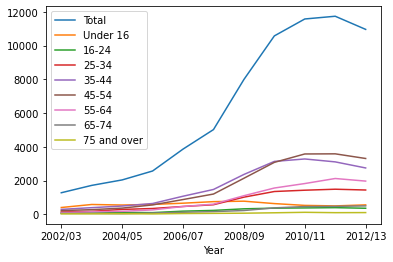

In [34]:
data_age.plot()
plt.show()

In [35]:
data_age2 = data_age.drop("Total", axis=1)

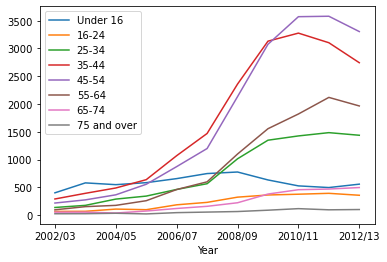

In [36]:
data_age2.plot()
plt.show()

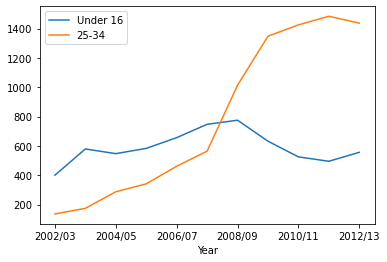

In [37]:
data_age2['Under 16'].plot(label="Under 16", legend=True)
data_age2['25-34'].plot(label="25-34", legend=True)
plt.show()

### Time Series

#### Dummy Data

In [38]:
from datetime import datetime as dt

In [39]:
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')

In [40]:
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [41]:
timeseries_df = pd.DataFrame(data=date_rng, columns=['datetime'])

In [42]:
timeseries_df

,datetime
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00
...,...
164,2020-01-07 20:00:00
165,2020-01-07 21:00:00
166,2020-01-07 22:00:00
167,2020-01-07 23:00:00


In [43]:
timeseries_df['data'] = np.random.randint(0,100,size=timeseries_df.shape[0])

In [44]:
timeseries_df

,datetime,data
0,2020-01-01 00:00:00,11
1,2020-01-01 01:00:00,89
2,2020-01-01 02:00:00,12
3,2020-01-01 03:00:00,81
4,2020-01-01 04:00:00,6
...,...,...
164,2020-01-07 20:00:00,2
165,2020-01-07 21:00:00,61
166,2020-01-07 22:00:00,3
167,2020-01-07 23:00:00,14


In [45]:
timeseries_df.set_index('datetime', inplace=True)

In [46]:
timeseries_df

,data
datetime,
2020-01-01 00:00:00,11
2020-01-01 01:00:00,89
2020-01-01 02:00:00,12
2020-01-01 03:00:00,81
2020-01-01 04:00:00,6
...,...
2020-01-07 20:00:00,2
2020-01-07 21:00:00,61
2020-01-07 22:00:00,3


In [47]:
list_date = [str(x) for x in timeseries_df.index]

In [48]:
list_date

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

In [51]:
curr_date = '2021-09-09'
tmr_date = '2021-09-10'
(dt.strptime(tmr_date, '%Y-%m-%d') - dt.strptime(curr_date, '%Y-%m-%d')).days

1

In [52]:
timeseries_df.loc['2020-01-02']

,data
datetime,
2020-01-02 00:00:00,90
2020-01-02 01:00:00,11
2020-01-02 02:00:00,33
2020-01-02 03:00:00,99
2020-01-02 04:00:00,51
2020-01-02 05:00:00,97
2020-01-02 06:00:00,85
2020-01-02 07:00:00,90
2020-01-02 08:00:00,33


In [53]:
timeseries_df.loc['2020-01-01']['data'].sum()

1158

In [54]:
timeseries_df.resample('D').sum()

,data
datetime,
2020-01-01,1158
2020-01-02,1301
2020-01-03,1244
2020-01-04,989
2020-01-05,1249
2020-01-06,1251
2020-01-07,1136
2020-01-08,17


In [55]:
### timeseries erat hubungannya dengan rolling window(?)

In [56]:
timeseries_df['rolling_sum'] = timeseries_df.rolling(3).sum()

In [57]:
timeseries_df.head()

,data,rolling_sum
datetime,,
2020-01-01 00:00:00,11,NaN
2020-01-01 01:00:00,89,NaN
2020-01-01 02:00:00,12,112.0
2020-01-01 03:00:00,81,182.0
2020-01-01 04:00:00,6,99.0


In [58]:
timeseries_df['rolling_sum'] = timeseries_df['rolling_sum'].fillna(method='backfill')

In [59]:
timeseries_df.head()

,data,rolling_sum
datetime,,
2020-01-01 00:00:00,11,112.0
2020-01-01 01:00:00,89,112.0
2020-01-01 02:00:00,12,112.0
2020-01-01 03:00:00,81,182.0
2020-01-01 04:00:00,6,99.0


#### OPSD Germany Daily

In [60]:
opsd_daily = pd.read_csv('opsd_germany_daily.csv', index_col=0, parse_dates=True)
opsd_daily.shape

(4383, 4)

In [61]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


In [62]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [63]:
opsd_daily.tail()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


In [64]:
opsd_daily.isnull().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

In [65]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday

In [66]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


In [67]:
opsd_daily.loc['2017-12-01']

Consumption    1592.96187
Wind             52.32300
Solar            19.26600
Wind+Solar       71.58900
Year           2017.00000
Month            12.00000
Weekday           4.00000
Name: 2017-12-01 00:00:00, dtype: float64

In [68]:
opsd_daily.loc['2017-12']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2017-12-01,1592.96187,52.323,19.266,71.589,2017,12,4
2017-12-02,1391.85405,126.274,16.459,142.733,2017,12,5
2017-12-03,1330.26226,387.490,12.411,399.901,2017,12,6
2017-12-04,1620.97758,479.798,10.747,490.545,2017,12,0
2017-12-05,1643.72307,611.488,10.953,622.441,2017,12,1
2017-12-06,1639.08265,632.501,7.618,640.119,2017,12,2
2017-12-07,1628.47979,743.725,42.994,786.719,2017,12,3
2017-12-08,1618.05658,652.830,20.504,673.334,2017,12,4
2017-12-09,1415.34531,712.317,12.344,724.661,2017,12,5


In [69]:
opsd_daily.loc['2017']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2017-01-01,1130.41300,307.125,35.291,342.416,2017,1,6
2017-01-02,1441.05200,295.099,12.479,307.578,2017,1,0
2017-01-03,1529.99000,666.173,9.351,675.524,2017,1,1
2017-01-04,1553.08300,686.578,12.814,699.392,2017,1,2
2017-01-05,1547.23800,261.758,20.797,282.555,2017,1,3
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,4


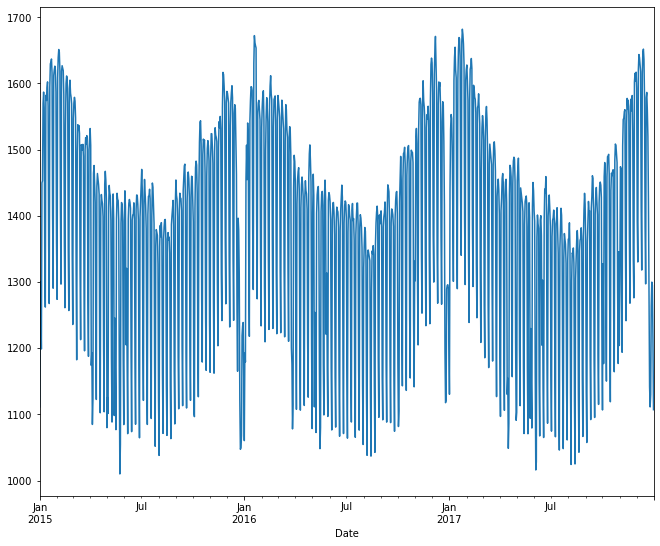

In [72]:
opsd_daily['2015':'2017']['Consumption'].plot(figsize=(11,9))
plt.show()

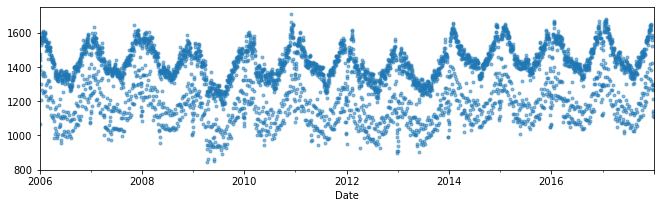

In [73]:
opsd_daily['Consumption'].plot(marker='.', alpha=0.5, linestyle='None',figsize=(11,3))
plt.show()

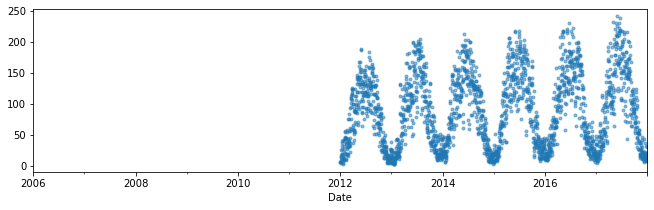

In [74]:
opsd_daily['Solar'].plot(marker='.', alpha=0.5, linestyle='None',figsize=(11,3))
plt.show()

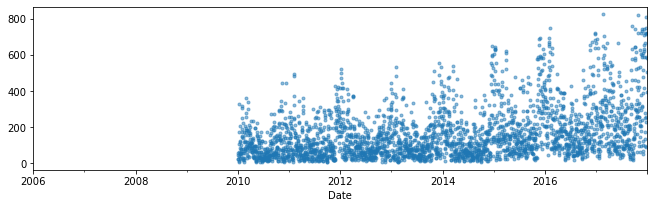

In [75]:
opsd_daily['Wind'].plot(marker='.', alpha=0.5, linestyle='None',figsize=(11,3))
plt.show()

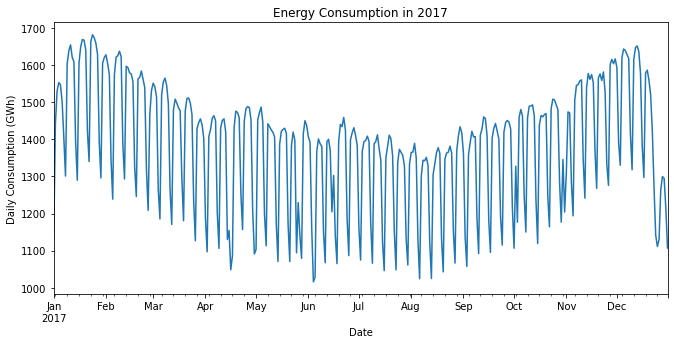

In [76]:
ax = opsd_daily.loc['2017', 'Consumption'].plot(figsize=(11, 5))
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Energy Consumption in 2017')
plt.show()

In [77]:
opsd_weekly_mean = opsd_daily.resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184000,NaN,NaN,NaN,2006.0,1.0,6.0
2006-01-08,1381.300143,NaN,NaN,NaN,2006.0,1.0,3.0
2006-01-15,1486.730286,NaN,NaN,NaN,2006.0,1.0,3.0


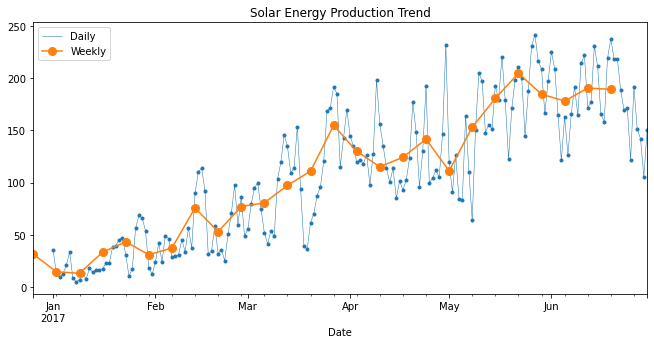

In [81]:
start, end = '2017-01', '2017-06'
opsd_daily.loc[start:end, 'Solar'].plot(marker='.', linestyle='-', linewidth=0.5, figsize=(11, 5), legend=True, label="Daily")
opsd_weekly_mean.loc[start:end, 'Solar'].plot(marker='o', markersize=8, linestyle='-', figsize=(11, 5), legend=True, label="Weekly")
plt.title('Solar Energy Production Trend')
plt.show()

EDA:
Ada fitur apa aja?
Missing Value? (standard, non standard, unexpected)
Trendnya gimana?